<a href="https://colab.research.google.com/github/tgarcia14/DigitalBuilders/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science 4330
Team name Digital Builders
by .edu Kevin Minzenmayer, Tony Garcia, and YaeEun Yi

1.   Tony Garcia - tgarcia14@angelo.edu
2.   Kevin Minzenmayer - kminzenmayer@angelo.edu
3.   YaeEun Yi - yyi@angelo.edu

This data source comes from data.gov with a direct link [Here]( https://catalog.data.gov/dataset/data-breach-notifications-affecting-washington-residents)

This data shows security incidents that have happened in the state of washington, what was the cause, and how many were affected by the incidents.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import scipy.stats as stats
import statsmodels as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from mpl_toolkits import mplot3d
import statsmodels.api as sm
from sklearn.feature_selection import r_regression
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import metrics
from sklearn.metrics import f1_score
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

In [ ]:
import requests
url = 'https://data.wa.gov/api/views/sb4j-ca4h/rows.json?accessType=DOWNLOAD'
response = requests.get(url)
data = response.json()
records = data['data']
column_names = [column['name'] for column in data['meta']['view']['columns']]
data_breach_df = pd.DataFrame(records, columns=column_names)
data_breach_df

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,DateAware,DateSubmitted,...,DaysToContainBreach,DaysToIdentifyBreach,DaysBreachLifecycle,DiscoveredInProgress,DaysOfExposure,DaysElapsedBetweenEndAndDiscovery,EndedOnDayDiscovered,DaysElapsedBeforeNotification,DaysOfExposureRange,EntityState
0,row-6qk9_de8m.phi8,00000000-0000-0000-F310-5A5E582C3935,0,1733194805,None,1733194805,None,{ },2021-02-04T00:00:00,2021-03-17T00:00:00,...,4,0,4,True,4,None,False,41,1-99,None
1,row-59xm-fxrv-ka5f,00000000-0000-0000-B3FD-CF767702C2E9,0,1733194805,None,1733194805,None,{ },2019-12-20T00:00:00,2021-03-17T00:00:00,...,None,None,None,False,None,None,False,453,Unknown,None
2,row-ycxp_nqh6~mygb,00000000-0000-0000-BB4B-F852857AB5DB,0,1733194805,None,1733194805,None,{ },2021-02-22T00:00:00,2021-03-17T00:00:00,...,0,60,60,False,5,55,False,23,1-99,None
3,row-m6uc.zygd~tjcz,00000000-0000-0000-E0B3-22B51FA44495,0,1733194805,None,1733194805,None,{ },2020-05-24T00:00:00,2021-03-18T00:00:00,...,None,0,None,False,None,None,False,298,Unknown,None
4,row-tvz9.q38j.y4ea,00000000-0000-0000-B7AC-365D277CC3C3,0,1733194805,None,1733194805,None,{ },2021-01-18T00:00:00,2021-03-19T00:00:00,...,0,6,6,True,6,None,True,60,1-99,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,row-kcm5_auck_3rrf,00000000-0000-0000-28C2-6058323717FC,0,1733194805,None,1733194805,None,{ },2024-02-21T00:00:00,2024-08-03T00:00:00,...,0,4,4,False,3,1,False,164,1-99,MN
1209,row-4niy~ax6b-2w92,00000000-0000-0000-4A8A-5D28BC694B64,0,1733194805,None,1733194805,None,{ },2024-06-11T00:00:00,2024-08-05T00:00:00,...,0,16,16,False,2,14,False,55,1-99,WA
1210,row-nz3i~z7dw.nt23,00000000-0000-0000-E58C-154B280418B7,0,1733194805,None,1733194805,None,{ },2024-03-02T00:00:00,2024-08-13T00:00:00,...,0,9,9,True,9,None,True,164,1-99,ID
1211,row-5sad.6add~dekd,00000000-0000-0000-2889-1E8F39C76B1E,0,1733194805,None,1733194805,None,{ },2024-04-01T00:00:00,2024-09-09T00:00:00,...,0,0,0,True,0,None,True,161,0,IL


# ***Data Cleaning and Exploration***

In [ ]:
# Copy the DataFrame to avoid modifying the original
cleaned_df = data_breach_df.copy()

# Remove unnecessary columns (if any)
# Example: Drop columns like 'ID' or any irrelevant text-heavy fields
cleaned_df = cleaned_df.drop(['DateEnd'], axis=1)
cleaned_df = cleaned_df.drop(['Id'], axis=1)
cleaned_df = cleaned_df.drop(['EntityState'], axis=1)
# Handle missing values
# Here, missing data with impute data
cleaned_df['CyberattackType'] = cleaned_df['CyberattackType'].fillna('Other')
cleaned_df['BusinessType'] = cleaned_df['BusinessType'].fillna('Other')
cleaned_df['DataBreachCause'] = cleaned_df['DataBreachCause'].fillna('Unknown/unclear')

# Convert data types if needed
# Convert 'DateAware' and 'DateSubmitted' columns to datetime objects for analysis
cleaned_df['DateAware'] = pd.to_datetime(cleaned_df['DateAware'])
cleaned_df['DateSubmitted'] = pd.to_datetime(cleaned_df['DateSubmitted'])

# Standardize string values (if needed)
# Example: Convert all string data to lowercase for consistency
for column in cleaned_df.select_dtypes(include=['object']):
    cleaned_df[column] = cleaned_df[column].str.lower()

#Converts WashingtonAffected to an INT
cleaned_df['WashingtoniansAffected'] = cleaned_df['WashingtoniansAffected'].fillna(0).astype(int)
cleaned_df['WashingtoniansAffected'] = cleaned_df['WashingtoniansAffected'].astype(int)
# Remove duplicates
cleaned_df = cleaned_df.drop_duplicates()

# Check for inconsistencies or outliers in numeric columns
# Example: Check for outliers in 'WashingtoniansAffected' and 'DaysToContainBreach'
print(cleaned_df['WashingtoniansAffected'].describe())
print(cleaned_df['DaysToContainBreach'].describe())

# Optional: Handle specific outliers or inconsistencies
# Example: Remove extreme outliers based on domain knowledge
# cleaned_df = cleaned_df[cleaned_df['WashingtoniansAffected'] < threshold_value]
# Mean imputation for 'DaysToContainBreach' column
####
cleaned_df['DaysToContainBreach'] = pd.to_numeric(cleaned_df['DaysToContainBreach'], errors='coerce')
cleaned_df['DaysToContainBreach'] = cleaned_df['DaysToContainBreach'].fillna(cleaned_df['DaysToContainBreach'].mean()).astype(int)

#Mean imputation for  Days to Identify and conversion to Int
####
cleaned_df.loc[:, 'DaysToIdentifyBreach'] = pd.to_numeric(cleaned_df['DaysToIdentifyBreach'], errors='coerce')
cleaned_df['DaysToIdentifyBreach'] = cleaned_df['DaysToIdentifyBreach'].fillna(cleaned_df['DaysToIdentifyBreach'].mean()).astype(int)
# Mean imputations for Days of exposure and conversion to Int
cleaned_df.loc[:, 'DaysOfExposure'] = pd.to_numeric(cleaned_df['DaysOfExposure'], errors='coerce')
cleaned_df['DaysOfExposure'] = cleaned_df['DaysOfExposure'].fillna(cleaned_df['DaysOfExposure'].mean()).astype(int)

#Mean imputation for DaysBreachLifecycle and conversion to Int
cleaned_df.loc[:, 'DaysBreachLifecycle'] = pd.to_numeric(cleaned_df['DaysBreachLifecycle'], errors='coerce')
cleaned_df['DaysBreachLifecycle'] = cleaned_df['DaysBreachLifecycle'].fillna(cleaned_df['DaysBreachLifecycle'].mean()).astype(int)

#DaysElapsedBetweenEndAndDiscovery
cleaned_df.loc[:, 'DaysElapsedBetweenEndAndDiscovery'] = pd.to_numeric(cleaned_df['DaysElapsedBetweenEndAndDiscovery'], errors='coerce')
cleaned_df['DaysElapsedBetweenEndAndDiscovery'] = cleaned_df['DaysElapsedBetweenEndAndDiscovery'].fillna(cleaned_df['DaysElapsedBetweenEndAndDiscovery'].mean()).astype(int)

#DaysElapsedBeforeNotification
cleaned_df.loc[:, 'DaysElapsedBeforeNotification'] = pd.to_numeric(cleaned_df['DaysElapsedBeforeNotification'], errors='coerce')
cleaned_df['DaysElapsedBeforeNotification'] = cleaned_df['DaysElapsedBeforeNotification'].fillna(cleaned_df['DaysElapsedBeforeNotification'].mean()).astype(int)


cleaned_df.drop('sid', axis=1, inplace=True)
cleaned_df.drop('id', axis=1, inplace=True)
cleaned_df.drop('position', axis=1, inplace=True)
cleaned_df.drop('created_at', axis=1, inplace=True)
cleaned_df.drop('created_meta', axis=1, inplace=True)
cleaned_df.drop('updated_at', axis=1, inplace=True)
cleaned_df.drop('updated_meta', axis=1, inplace=True)
cleaned_df.drop('meta', axis=1, inplace=True)

cleaned_df['DateStart'] = pd.to_datetime(cleaned_df['DateStart'])

cleaned_df['Year'] = cleaned_df['Year'].astype(int)
cleaned_df['YearText'] = cleaned_df['YearText'].astype(int)
# Show the first few rows of the cleaned dataset
cleaned_df.head(200)
df = cleaned_df

count    1.213000e+03
mean     3.035297e+04
std      1.783883e+05
min      0.000000e+00
25%      8.100000e+02
50%      1.687000e+03
75%      6.586000e+03
max      3.243664e+06
Name: WashingtoniansAffected, dtype: float64
count     982
unique     62
top         0
freq      771
Name: DaysToContainBreach, dtype: object


<ipython-input-3-9204659a7a8e>:47: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cleaned_df['DaysToIdentifyBreach'] = cleaned_df['DaysToIdentifyBreach'].fillna(cleaned_df['DaysToIdentifyBreach'].mean()).astype(int)
<ipython-input-3-9204659a7a8e>:50: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cleaned_df['DaysOfExposure'] = cleaned_df['DaysOfExposure'].fillna(cleaned_df['DaysOfExposure'].mean()).astype(int)
<ipython-input-3-9204659a7a8e>:54: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a futu

datatypes are changed to integers for numerical features

# Scatterplot

The time something occurred and the time it was fixed varies, or time known

Text(0.5, 1.0, 'Efficiency')

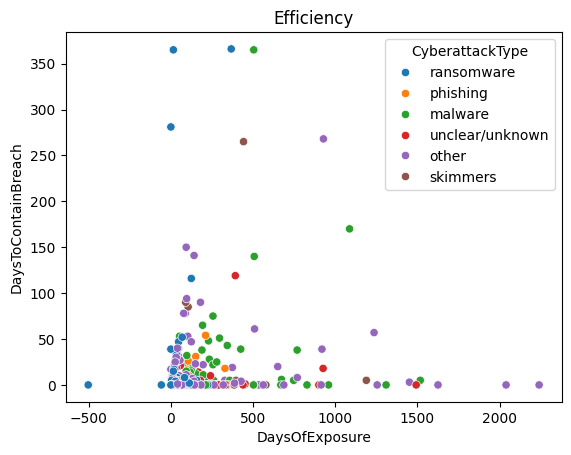

In [ ]:
sns.scatterplot(data=cleaned_df, x='DaysOfExposure', y='DaysToContainBreach', hue='CyberattackType')
plt.title("Efficiency")


# Bar chart

categorical feature count of industry type

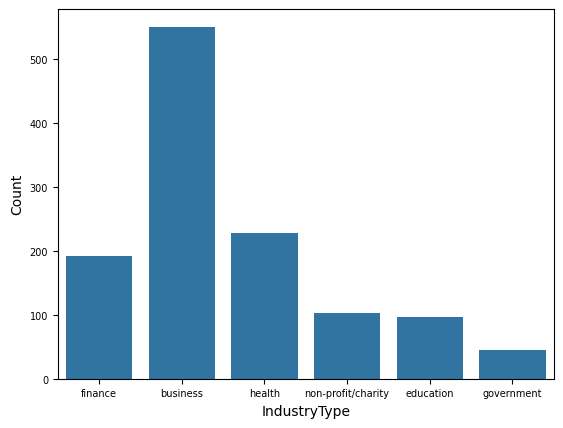

In [ ]:
b = sns.countplot(x='IndustryType', data=cleaned_df)
b.tick_params(labelsize=7)
plt.ylabel("Count")
plt.show()
# areas where breaches are

number of the types of industry where the breaches occur with a lot being in the business sector

# Histogram

categorical feature cyberattack type

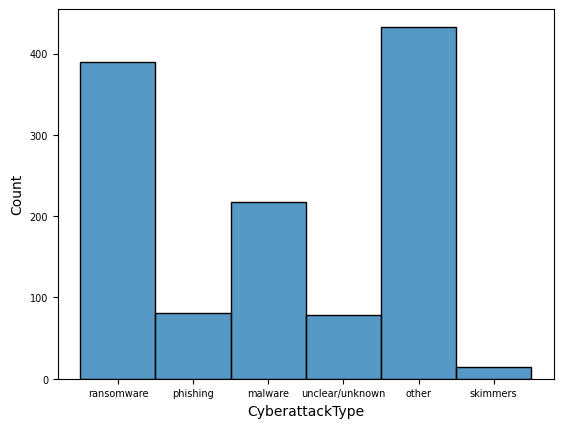

In [ ]:
b = sns.histplot(x='CyberattackType', data=cleaned_df)
b.tick_params(labelsize=7)
plt.show()
# shows the number of different types of attacks

this shows the number of different cyberattack types with most being ransomware or unidentified

the pairplot is here to identify any relationships among the data

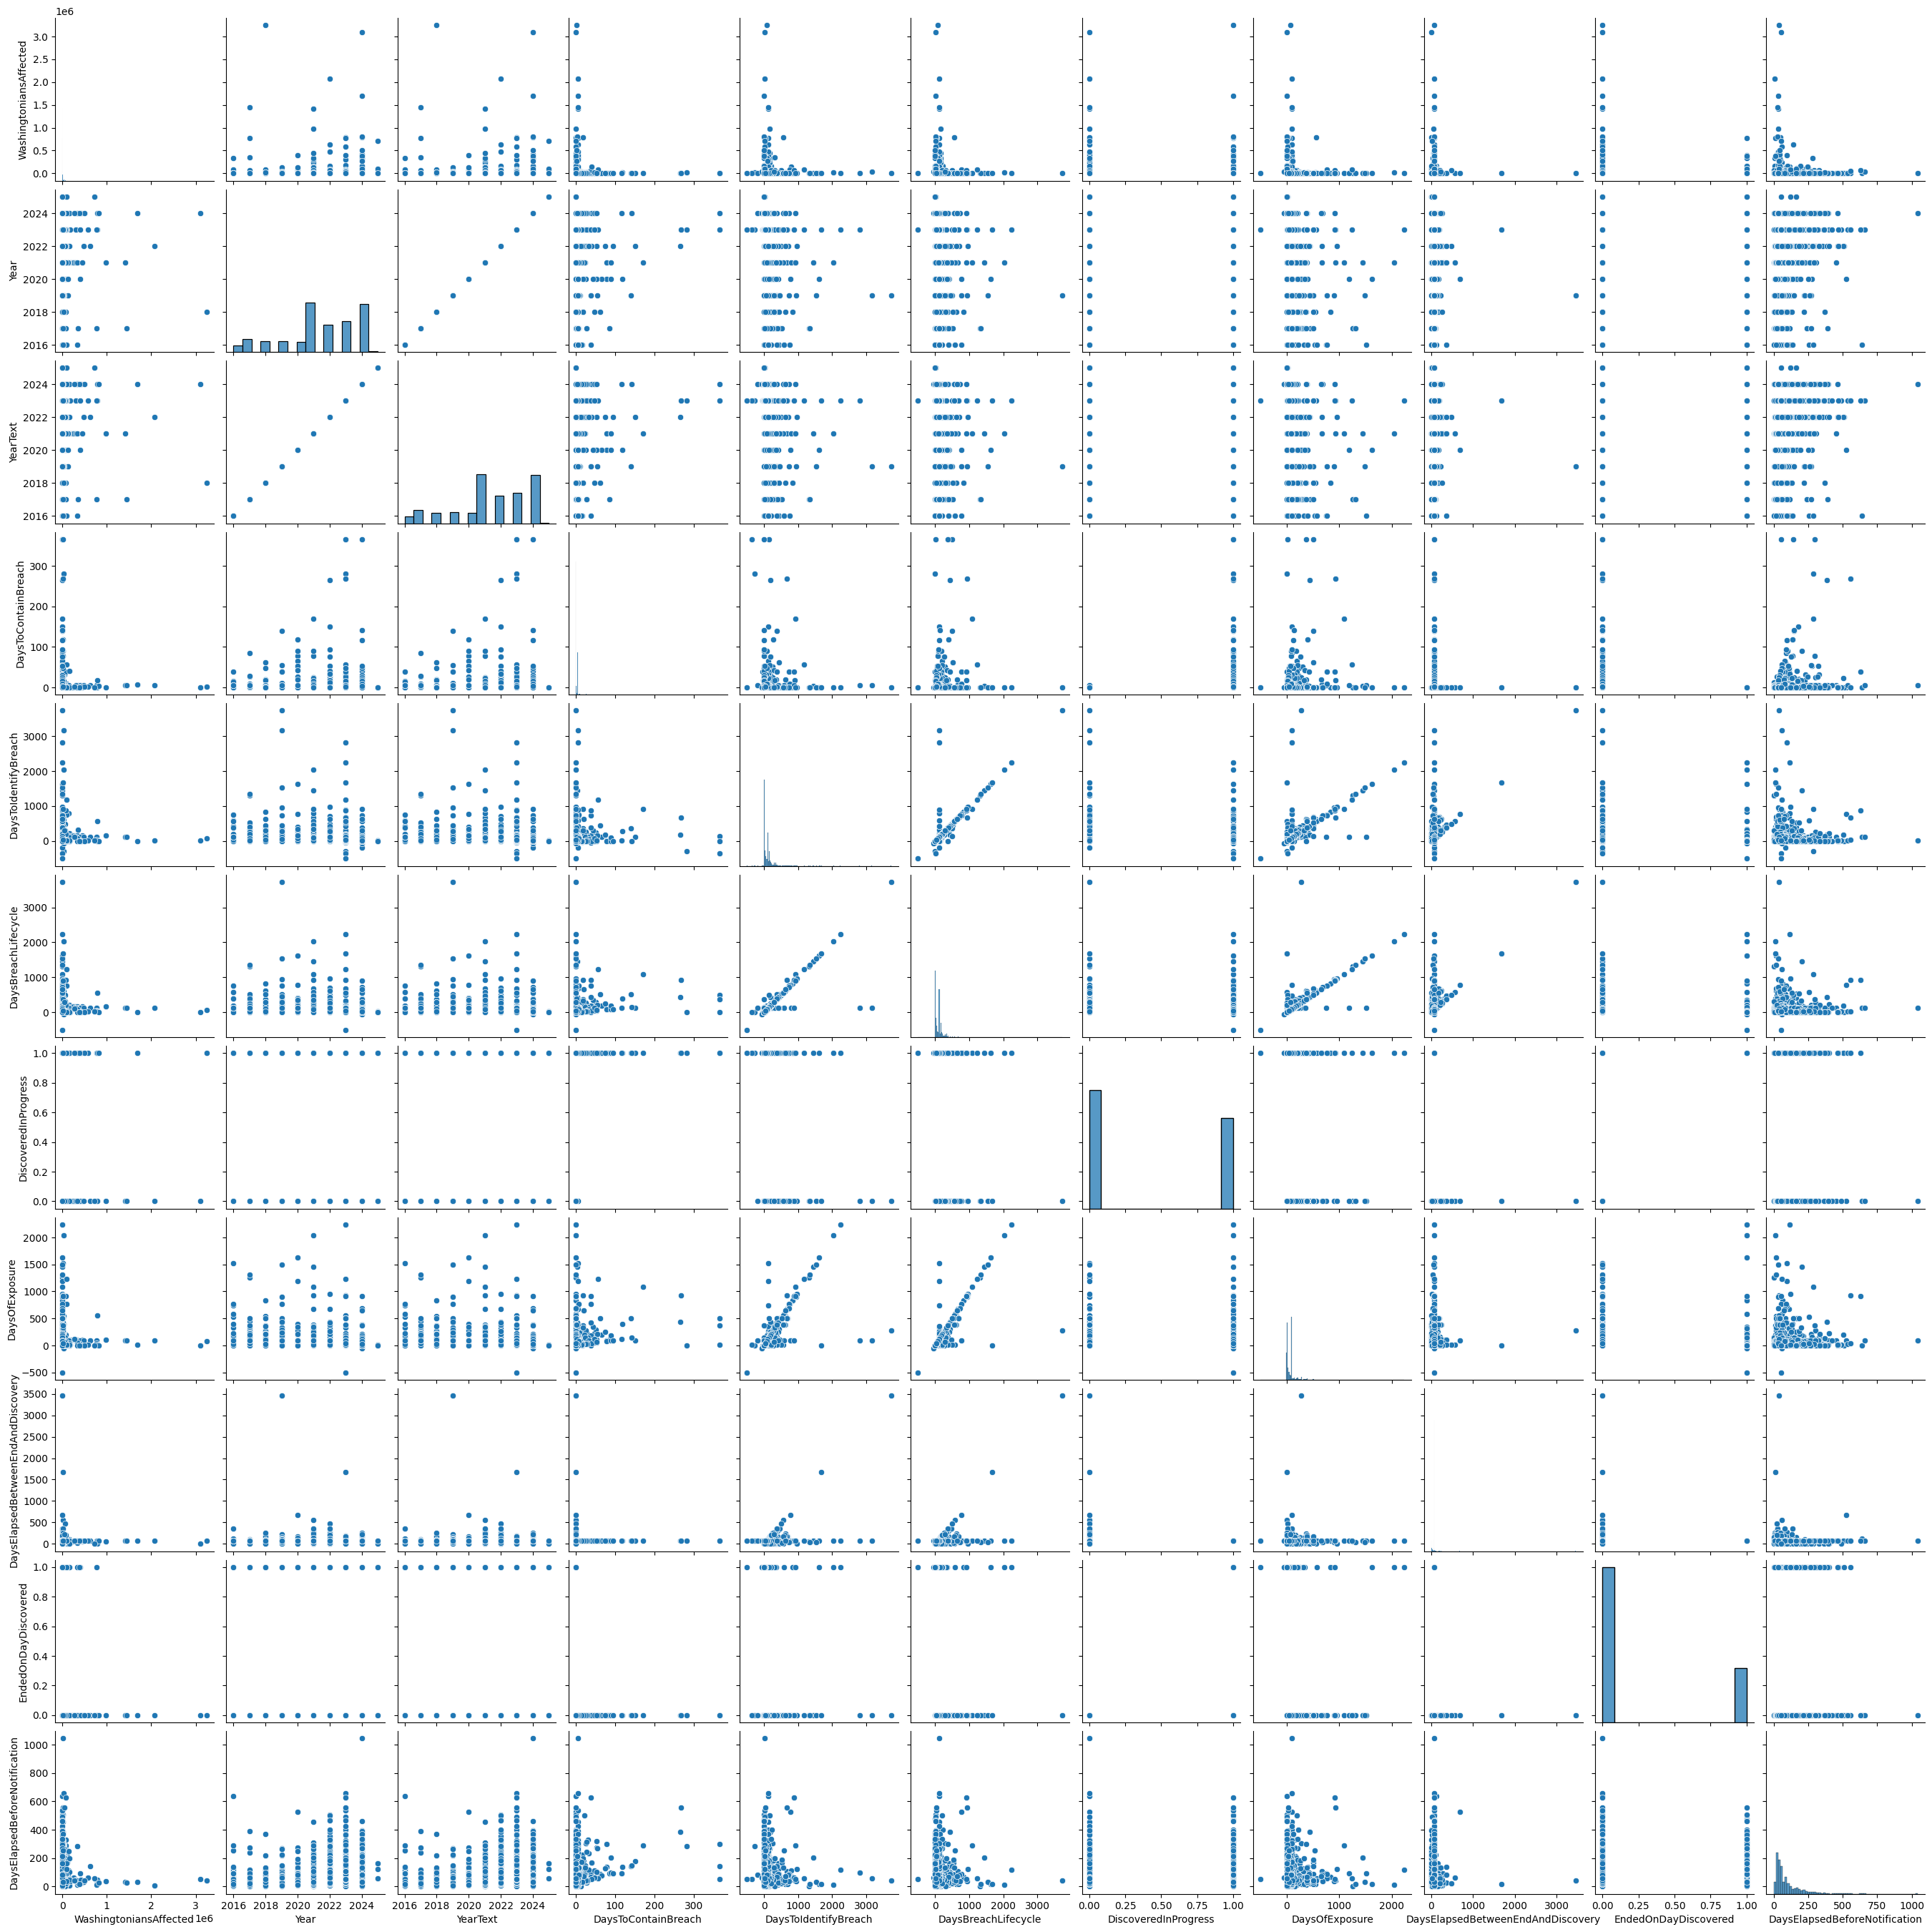

In [ ]:
sns.pairplot(cleaned_df)

numerical values are compared here

In [ ]:
cleaned_df[['DaysToContainBreach','DaysToIdentifyBreach','DaysBreachLifecycle','DaysOfExposure','DaysElapsedBetweenEndAndDiscovery','DaysElapsedBeforeNotification']]

,DaysToContainBreach,DaysToIdentifyBreach,DaysBreachLifecycle,DaysOfExposure,DaysElapsedBetweenEndAndDiscovery,DaysElapsedBeforeNotification
0,4,0,4,4,72,41
1,5,118,123,93,72,453
2,0,60,60,5,55,23
3,5,0,123,93,72,298
4,0,6,6,6,72,60
...,...,...,...,...,...,...
1208,0,4,4,3,1,164
1209,0,16,16,2,14,55
1210,0,9,9,9,72,164
1211,0,0,0,0,72,161


In [ ]:
df = cleaned_df

Histograms of numerical features

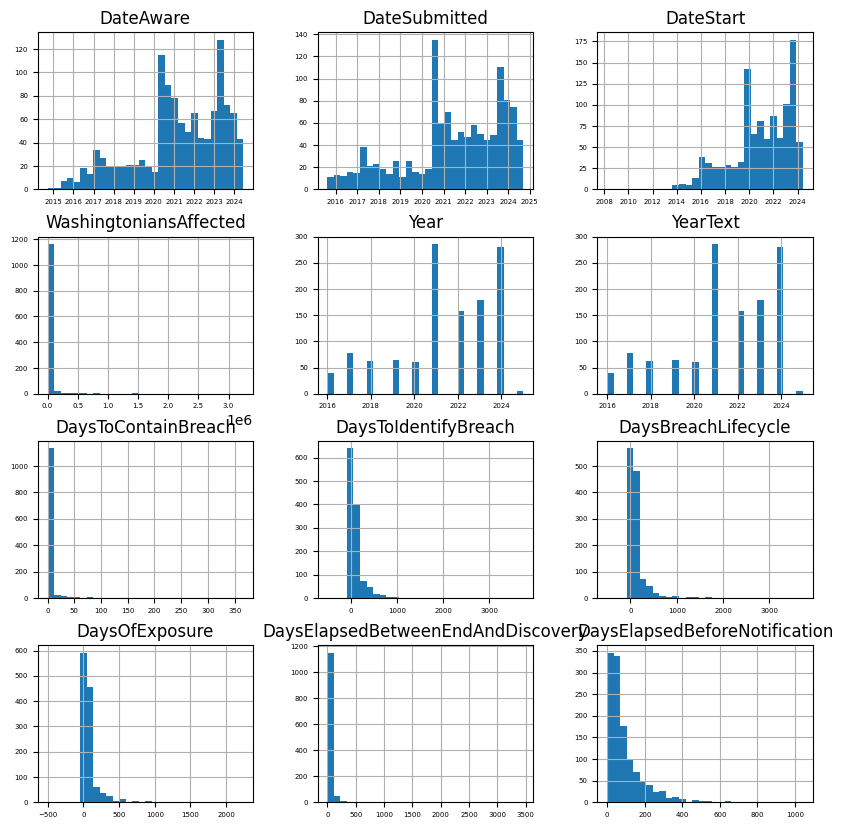

In [ ]:
axes = cleaned_df.hist(figsize=(10, 10),bins=30)
for ax in axes.flatten():
    ax.tick_params(labelsize=5)

a lot of the feautures vary and are skewed

# Density Plot

<Axes: xlabel='DaysToIdentifyBreach', ylabel='Density'>

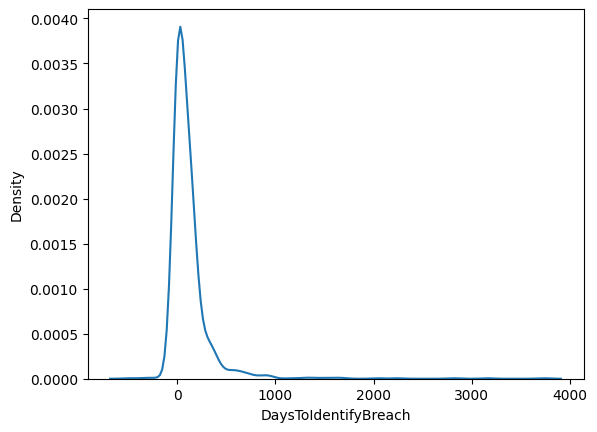

In [ ]:
sns.kdeplot(x='DaysToIdentifyBreach', data=cleaned_df)

there is a symmetric distribution that is very centralized for the density of the days to identify a breach

# Box Plot

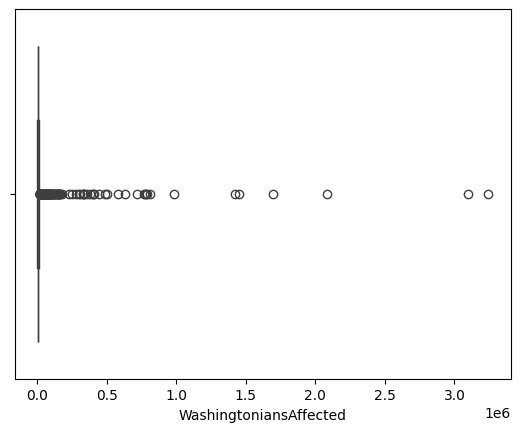

In [ ]:
sns.boxplot(x='WashingtoniansAffected', data=cleaned_df)
plt.show()

there are many values far outside to the right of three standard deviations

# Swarmplot

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 65.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 44.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='DataBreachCause', ylabel='DaysToIdentifyBreach'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 70.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 29.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 53.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


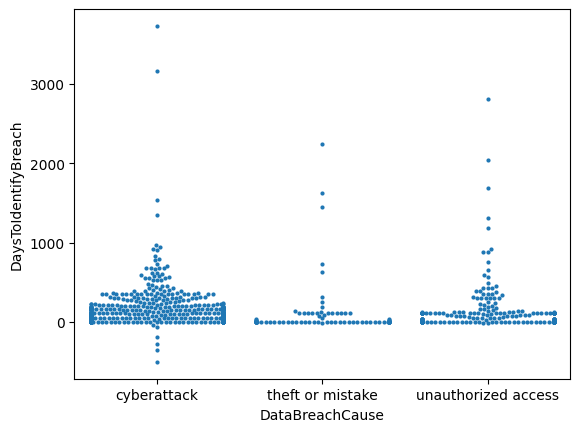

In [ ]:
xlist = []
ylist = []
i = 0
for i in range(1200):
  xlist.append('DataBreachCause[i]')
  ylist.append('DaysToIdentifyBreach[i]')
  i += 10
sns.swarmplot(data=cleaned_df, x='DataBreachCause', y='DaysToIdentifyBreach',size=3)

most breach causes are by cyberattacks

# Histogram of Breach Lifecycle Range

{'1-99': 533, 'unknown': 249, '500+': 46, '300-399': 55, '100-199': 173, '400-499': 12, '200-299': 53, '0': 92}


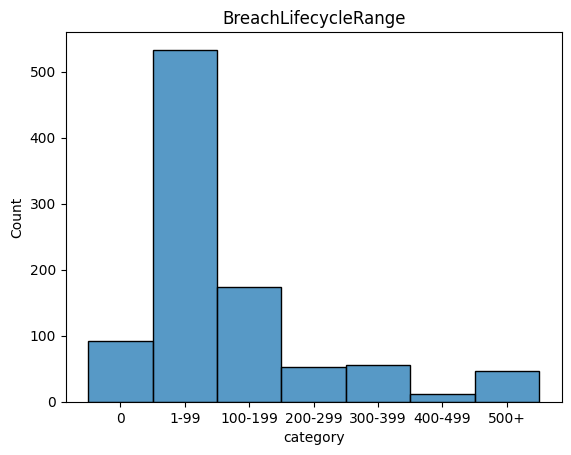

In [ ]:
count = {}
for BreachLifecycleRange in cleaned_df['BreachLifecycleRange']:
  if BreachLifecycleRange in count:
    count[BreachLifecycleRange] += 1
  else:
    count[BreachLifecycleRange] = 1
print(count)

data = pd.DataFrame(list(count.items()), columns = ['category', 'count'])
category_order = ['0','1-99','100-199','200-299','300-399','400-499','500+']
data['category'] = pd.Categorical(data['category'], categories=category_order, ordered=True)
data = data.sort_values('category')
sns.histplot(data=data, x='category', weights='count', discrete=True)
plt.title('BreachLifecycleRange')
plt.show()

the range of values for the breach lifecycle range vary a lot, but most fall toward the center

# Strip Plot

<Axes: xlabel='DaysToIdentifyBreach', ylabel='BusinessType'>

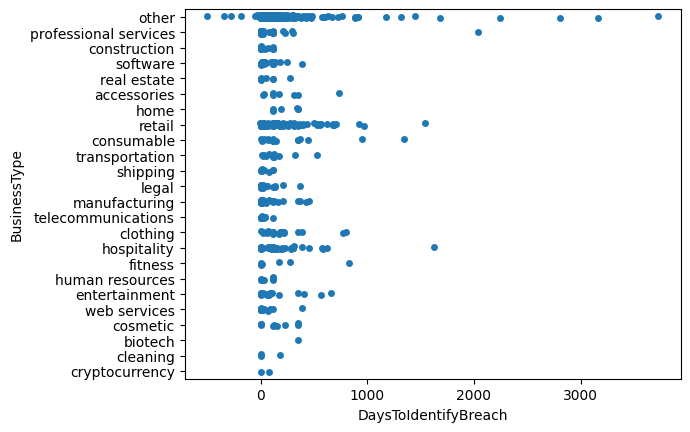

In [ ]:
xlist = []
ylist = []
i = 0
for i in range(1200):
  xlist.append('Year[i]')
  ylist.append('DaysToContainBreach[i]')
  i += 10
sns.stripplot(data=cleaned_df, x='DaysToIdentifyBreach', y='BusinessType')

the largest amounts of the days to identify a breach are in an unknown category

# Scatter Matrix

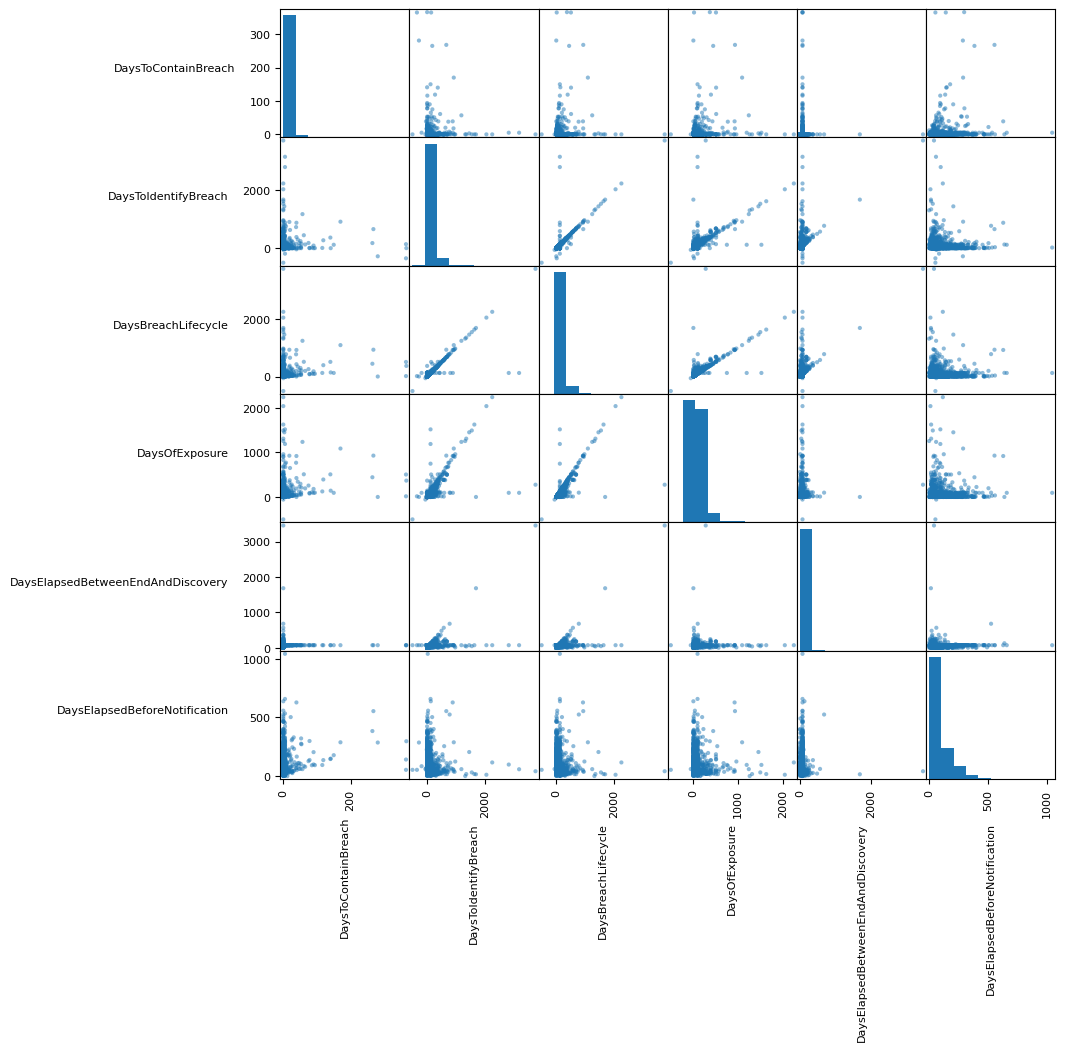

In [ ]:
scatter = pd.plotting.scatter_matrix(cleaned_df[['DaysToContainBreach','DaysToIdentifyBreach','DaysBreachLifecycle','DaysOfExposure','DaysElapsedBetweenEndAndDiscovery','DaysElapsedBeforeNotification']],figsize=(10,10))
for ax in scatter.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8,rotation=90)
    ax.set_ylabel(ax.get_ylabel(), fontsize=8,rotation=0,labelpad=10,ha='right')
plt.show()

this shows better the data relationships than the pairplot for the numerical features

# Conclusion

The goal was to explore relations between data.

# ***Regression***

The significant outliers are removed using their z_score, those that fall outside 99.7% of the distribution. Other plots look skewed but with a large enough sample, and very few values far away from the mean, a normal distribution can be used. Using the pairplot there are a couple of plots of the numerical data that appear normal.

In [ ]:
copy = df
copy['z_scoreX'] = (copy['DaysBreachLifecycle'] - copy['DaysBreachLifecycle'].mean()) / copy['DaysBreachLifecycle'].std()
copy = copy.loc[copy['z_scoreX'].abs() <= 3]

copy['z_scoreY'] = (copy['DaysOfExposure'] - copy['DaysOfExposure'].mean()) / copy['DaysOfExposure'].std()
copy = copy.loc[copy['z_scoreY'].abs() <= 3]

copy = copy.loc[copy['DaysOfExposure'] >= 0]

<ipython-input-17-acdfd6f17f43>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy['z_scoreY'] = (copy['DaysOfExposure'] - copy['DaysOfExposure'].mean()) / copy['DaysOfExposure'].std()


**Regression Summary**

This code predicts the dependent variable or Y variable, DaysOfExposure, based on the independent variable or X varible, DaysBreachLifecycle.

This type of prediction is useful for understanding the relationship between breach lifecycle duration and exposure duration within the state of Washington.

Plot the model

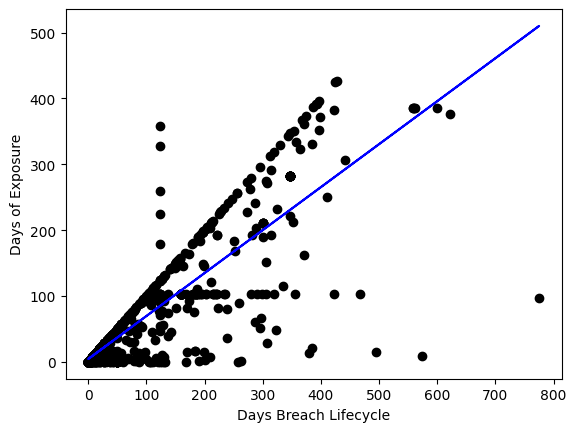

In [ ]:
X = copy[['DaysBreachLifecycle']].values.reshape(-1,1)
y = copy[['DaysOfExposure']].values.reshape(-1,1)
linModel = LinearRegression()
linModel.fit(X, y)
yPred = linModel.predict(X)
plt.scatter(X, y, color='black')
plt.plot(X, yPred, color='blue')
plt.xlabel('Days Breach Lifecycle')
plt.ylabel('Days of Exposure')
plt.show()


 The plot displays a positive association between these two variables, meaning that as the days of breach lifecycle increase, the days of exposure also tend to increase.

The r_squared value is good enough that it supports there is a positive association. The impact can vary from one case to the other with how long the lifecycle, or the affect the breach had, versus how long the breach was exposed.

In [ ]:
r = r_regression(X, np.ravel(y))[0]
print('r = ', r)
print('r_squared = ', r**2)

r =  0.8501680098893222
r_squared =  0.7227856450391706


The values on the changed data are far less than the previous outliers

The value of the residuals can be fairly high,
which is why r-squared isn't any larger

The same plot is shown with the residuals

Text(0, 0.5, 'Days of Exposure')

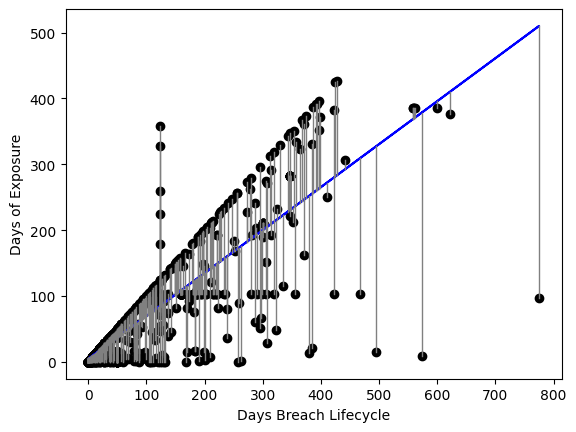

In [ ]:
plt.scatter(X, y, color='black')
plt.plot(X, yPred, color='blue')
for i in range(len(X)):
    plt.plot([X[i], X[i]], [y[i], yPred[i]], color='grey', linewidth=1)
plt.xlabel('Days Breach Lifecycle')
plt.ylabel('Days of Exposure')

On average the residuals tend to increase

# Multiple variables are plotted together

Three variables are looked at in 2D with removed outliers before plotting together

In [ ]:
copy['z_scoreX'] = (copy['DaysToIdentifyBreach'] - copy['DaysToIdentifyBreach'].mean()) / copy['DaysToIdentifyBreach'].std()
copy = copy.loc[copy['z_scoreX'].abs() <= 3]
copy = copy.loc[copy['DaysToIdentifyBreach'] >= 0]

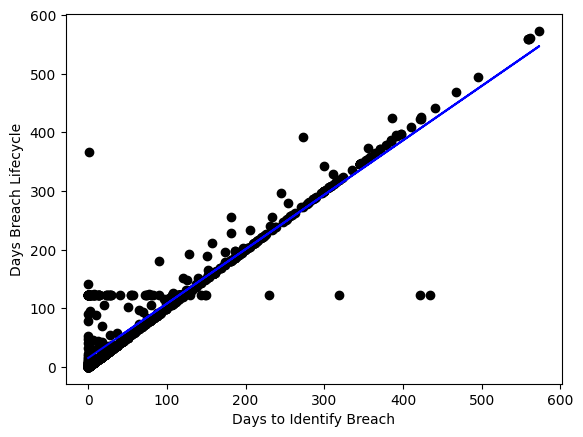

In [ ]:
X = copy[['DaysToIdentifyBreach']].values.reshape(-1,1)
y = copy[['DaysBreachLifecycle']].values.reshape(-1,1)
linModel = LinearRegression()
linModel.fit(X, y)
yPred = linModel.predict(X)
plt.scatter(X, y, color='black')
plt.plot(X, yPred, color='blue')
plt.xlabel('Days to Identify Breach')
plt.ylabel('Days Breach Lifecycle')
plt.show()

These two features look like there is a stronger relationship and a high r-squared value supports a strong positive association, although they may not be independent from one another

In [ ]:
r = r_regression(X, np.ravel(y))[0]
print('r = ', r)
print('r_squared = ', r**2)

r =  0.9450280735349197
r_squared =  0.8930780597691216


Third plot, this is just to help with the multiple variable regression, or the three dimensional plot

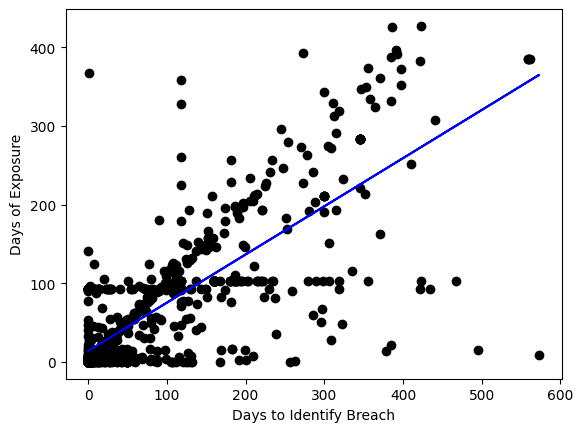

In [ ]:
X = copy[['DaysToIdentifyBreach']].values.reshape(-1,1)
y = copy[['DaysOfExposure']].values.reshape(-1,1)
linModel = LinearRegression()
linModel.fit(X, y)
yPred = linModel.predict(X)
plt.scatter(X, y, color='black')
plt.plot(X, yPred, color='blue')
plt.xlabel('Days to Identify Breach')
plt.ylabel('Days of Exposure')
plt.show()

This model doesnt suggest there is any nonlinear trend

In [ ]:
r = r_regression(X, np.ravel(y))[0]
print('r = ', r)
print('r_squared = ', r**2)

r =  0.7893227762411116
r_squared =  0.6230304450929759


The Days of Exposure appears to vary the most out of the three features, there is a weaker trend

A linear regression is done for the three features.

*   DaysToIdentifyBreach
*   DaysBreachLifecycle
*   DaysOfExposure

Text(0.5, 0, 'Days Breach Lifecycle')

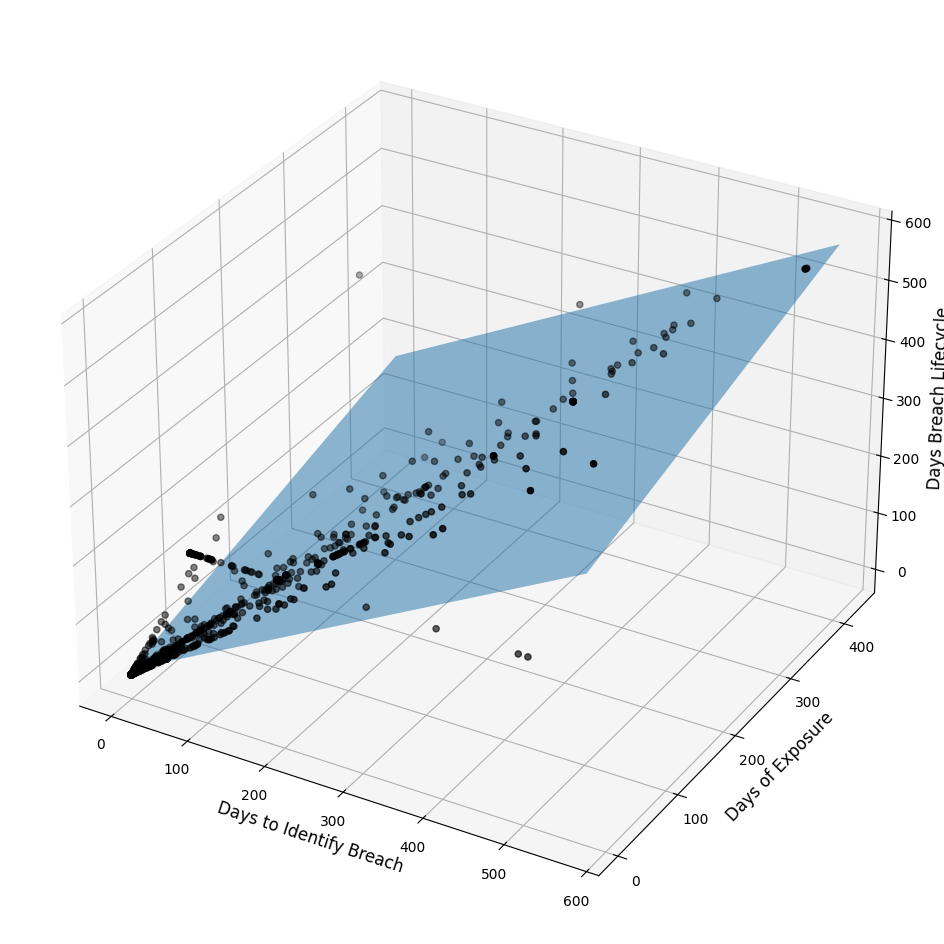

In [ ]:
X = copy[['DaysToIdentifyBreach', 'DaysOfExposure']].values.reshape(-1,2)
y = copy[['DaysBreachLifecycle']].values.reshape(-1,1)
linModel = LinearRegression()
linModel.fit(X, y)
fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0], X[:,1], y, color='black')
xDaysToIdentifyBreach, xDaysOfExposure = np.meshgrid(
    np.linspace(X[:,0].min(), X[:,0].max(), 2),
    np.linspace(X[:,1].min(), X[:,1].max(), 2),
)
yDaysBreachLifecycle = (linModel.intercept_[0]
                        + linModel.coef_[0,0] * xDaysToIdentifyBreach
                        + linModel.coef_[0,1] * xDaysOfExposure
)
ax.plot_surface(xDaysToIdentifyBreach, xDaysOfExposure, yDaysBreachLifecycle,alpha=0.5)
ax.set_xlabel('Days to Identify Breach',fontsize=12)
ax.set_ylabel('Days of Exposure',fontsize=12)
ax.set_zlabel('Days Breach Lifecycle',fontsize=12)

This 3D plot works in colab, but there might be a problem with jupyter. All the packeges are installed.

#Logistic Regression

 This plot shows the number of people in DC affected and whether or not the breach was caught in the first day.

<ipython-input-27-99b1a4b47718>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  EOD.loc[EOD['EndedOnDayDiscovered'] == True, 'EndedOnDayDiscovered'] = 1


Text(0, 0.5, 'Ended on Day Discovered')

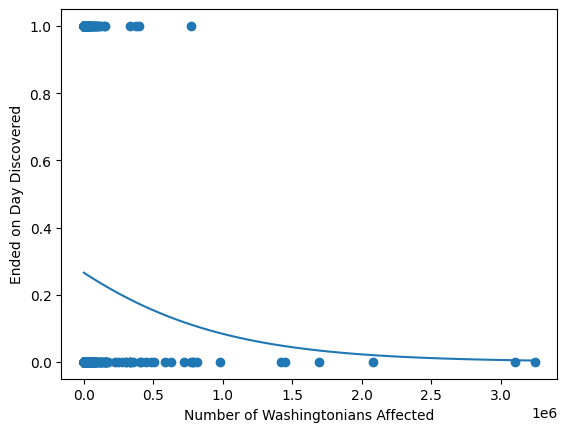

In [ ]:
#WashingtoniansAffected EndededOnDayDiscovered
EOD = df
EOD.loc[EOD['EndedOnDayDiscovered'] == True, 'EndedOnDayDiscovered'] = 1
EOD.loc[EOD['EndedOnDayDiscovered'] == False, 'EndedOnDayDiscovered'] = 0
X = EOD[['WashingtoniansAffected']].values.reshape(-1,1)
y = EOD[['EndedOnDayDiscovered']].values.reshape(-1,1).astype(int)
logisticModel = LogisticRegression()
logisticModel.fit(X, np.ravel(y.astype(int)))
plt.scatter(X, y)
xDelta = np.linspace(X.min(), X.max(), 100)
yPred = logisticModel.predict(X).reshape(-1,1).astype(int)
yDeltaProb = logisticModel.predict_proba(xDelta.reshape(-1,1))[:,1]
plt.plot(xDelta, yDeltaProb)
plt.xlabel('Number of Washingtonians Affected')
plt.ylabel('Ended on Day Discovered')

looking at the pairplot, there does not appear to be any good logistic regression trends in this data

These breaches happen fast and can affect a lot of people, and sometimes quickly is not enough. When a breach is not found quickly there are a lot more people who can be affected.

In [ ]:
prob = logisticModel.predict_proba([[0]])
print('Probability of going unnoticed during the first day:', prob[0][0])
print('Probability found on the first day', prob[0][1])

Probability of going unnoticed during the first day: 0.7344555821281038
Probability found on the first day 0.26554441787189614


There appears to be a 75% chance the breach was found on the first day

# Conclusion

The Days of Exposure is not as affected one way or the other as the other values are. It has a higher variation at larger values while the others don't. The other two linear plots show that. There is a chance of being larger if the breach goes unnoticed longer.

# ***Evaluation***

Outliers outside three standard deviations are removed

In [ ]:
df['z_scoreX'] = (df['DaysToIdentifyBreach'] -df['DaysToIdentifyBreach'].mean()) / df['DaysToIdentifyBreach'].std()
df = df.loc[df['z_scoreX'].abs() <= 3]

df['z_scoreY'] = (df['DaysOfExposure'] - df['DaysOfExposure'].mean()) / df['DaysOfExposure'].std()
df = df.loc[df['z_scoreY'].abs() <= 3]

df['z_scoreY'] = (df['DaysElapsedBetweenEndAndDiscovery'] - df['DaysElapsedBetweenEndAndDiscovery'].mean()) / df['DaysElapsedBetweenEndAndDiscovery'].std()
df = df.loc[df['z_scoreY'].abs() <= 3]

print(len(df[['DaysToIdentifyBreach']]))
print(len(df[['DaysOfExposure']]))
print(len(df[['DaysElapsedBetweenEndAndDiscovery']]))

1148
1148
1148


<ipython-input-29-5edf9c0406ad>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['z_scoreY'] = (df['DaysOfExposure'] - df['DaysOfExposure'].mean()) / df['DaysOfExposure'].std()


# Linear Model Cross Validation

In [ ]:
trainingData, testData = train_test_split(df, test_size=0.3)
X = trainingData[["DaysToIdentifyBreach"]].values.reshape(-1,1)
y = trainingData[["DaysOfExposure"]].values.reshape(-1,1)
linModel = LinearRegression()
linModel.fit(X, y)
yPredicted = linModel.predict(X)

In [ ]:
ten_fold_scores = -cross_val_score(linModel, X, y, scoring='neg_mean_squared_error', cv=10)
LOOCV_scores = -cross_val_score(linModel, X, y, scoring='neg_mean_squared_error', cv=40)
print('ten-fold average MSE =', np.mean(ten_fold_scores), '\n', ten_fold_scores)
print('\nk-fold average MSE =', np.mean(LOOCV_scores), '\n', LOOCV_scores)

ten-fold average MSE = 2325.281562999071 
 [1515.82785393 1913.30212323 4261.37852642 2208.5993687  3225.69415401
 1253.0360441  1708.76027372 2151.66242523 1642.11058474 3372.44427592]

k-fold average MSE = 2325.142194959524 
 [ 2554.04416665   760.02449895  2365.10444342   235.29405844
   923.84106041  2580.62834821  2124.84949564  2137.383143
  1360.4323157  12310.13911779  1203.28059357  2360.51987338
   989.82432128  2530.79269549  4317.04261239  1014.2833711
  6327.55793419  3641.79634673  1737.65477371  1209.75486306
  1177.5447649   1899.42875083  1159.65251247   748.55285317
   981.24599921   619.89581833  1352.70899939  3896.42393889
   663.95121584  3468.21466556  2427.40617381  1865.0670337
  2892.21154716   845.57434702  1214.79153864  1600.90301111
   965.01997561  4875.10730113  1392.95810127  6274.78121721]


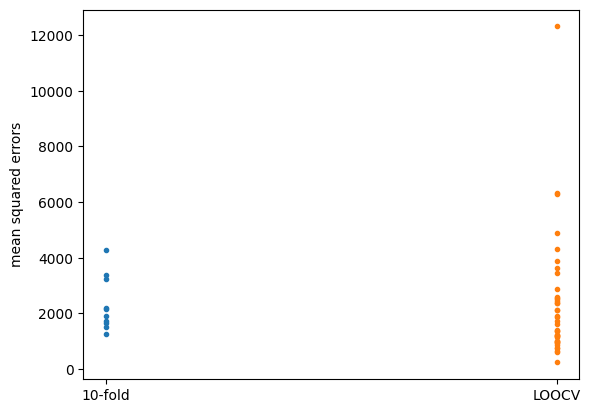

In [ ]:
plt.plot(np.zeros_like(ten_fold_scores), ten_fold_scores, '.')
plt.plot(np.zeros_like(LOOCV_scores) + 1, LOOCV_scores, '.')
plt.ylabel('mean squared errors');
plt.xticks([0,1], ['10-fold', 'LOOCV']);

In [ ]:
cross_val_score(linModel,X,y,cv=5)

array([0.7105464 , 0.49598396, 0.65950361, 0.75988781, 0.65732666])

# Bootstrap Method to Linear Model

In [ ]:
copy = df.copy()
bootstrapErrors = []
for i in range(0,40):
  boot = resample(copy, replace=True,n_samples=28)
  oob = copy[~copy.index.isin(boot.index)]

  XBoot = boot[['DaysToIdentifyBreach']].values.reshape(-1,1)
  yBoot = boot[['DaysOfExposure']].values.reshape(-1,1)
  linModel = LinearRegression()
  linModel.fit(XBoot, yBoot)
  XOob = oob[['DaysToIdentifyBreach']].values.reshape(-1,1)
  YOob = oob[['DaysOfExposure']].values.reshape(-1,1)
  YOobPredicted = linModel.predict(XOob)
  bootError = mean_squared_error(YOob, YOobPredicted)
  bootstrapErrors.append(bootError)
print("mean = ", np.mean(bootstrapErrors))
print("std dev = ", np.std(bootstrapErrors))

mean =  2714.650355035681
std dev =  637.9573017469406


the mean squared errors are similar to the cross validation model

# Train and Test Split for Linear Model

In [ ]:
df = df[df["DaysToIdentifyBreach"] >= 0]
X = df[["DaysToIdentifyBreach"]]
y = df[["DaysOfExposure"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
linModel = LinearRegression()
linModel.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))
y_pred = np.ravel(linModel.predict(X_test.reshape(-1,1)))

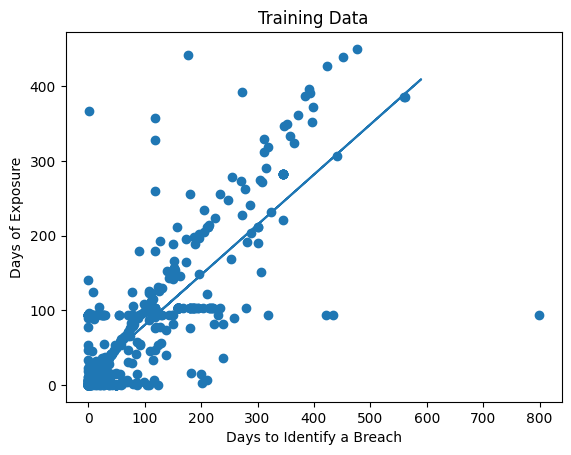

In [ ]:
plt.scatter(X_train, y_train)
plt.xlabel("Days to Identify a Breach")
plt.ylabel("Days of Exposure")
plt.title("Training Data")
plt.plot(X_test, y_pred)
plt.show()

In [ ]:
yPrediction = np.ravel(linModel.predict(X_train))
print("mean squared error = ", metrics.mean_squared_error(y_train, yPrediction))
print("root mean squared error = ", metrics.mean_squared_error(y_train, yPrediction, squared=False))
print("mean absolute error = ", metrics.mean_absolute_error(y_train, yPrediction))
print('r_squared = ', r2_score(y_train, yPrediction), end='\n\n')

mean squared error =  2250.0435433838297
root mean squared error =  47.4346238878715
mean absolute error =  27.175091951631565
r_squared =  0.6630513181730613



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


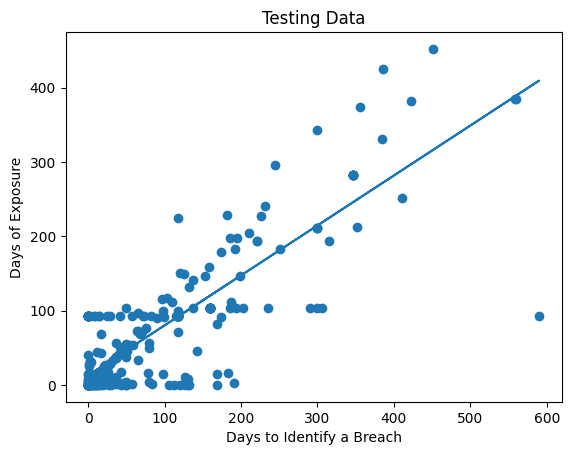

In [ ]:
plt.scatter(X_test, y_test)
plt.xlabel("Days to Identify a Breach")
plt.ylabel("Days of Exposure")
plt.title("Testing Data")
plt.plot(X_test, y_pred)
plt.show()

In [ ]:
yPrediction = np.ravel(linModel.predict(X_test))
print("mean squared error = ", metrics.mean_squared_error(y_test, yPrediction))
print("root mean squared error = ", metrics.mean_squared_error(y_test, yPrediction, squared=False))
print("mean absolute error = ", metrics.mean_absolute_error(y_test, yPrediction))
print('r_squared = ', r2_score(y_test, yPrediction), end='\n\n')

mean squared error =  1881.6309308559098
root mean squared error =  43.37777000787281
mean absolute error =  26.89189943002747
r_squared =  0.7207221541850588



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Cross Validation for Multiple Features

In [ ]:
X = df[["DaysToIdentifyBreach", "DaysElapsedBetweenEndAndDiscovery"]].values.reshape(-1,2)
y = df[["DaysOfExposure"]].values.reshape(-1,1)
multi = LinearRegression()
multi = multi.fit(X,y)
tenFoldMulti = -cross_val_score(multi,X,y,scoring='neg_mean_squared_error',cv=10)
loocvMulti = -cross_val_score(multi,X,y,scoring='neg_mean_squared_error',cv=40)
print('ten-fold average MSE =', np.mean(tenFoldMulti), '\n', tenFoldMulti)
print('\nk-fold average MSE =', np.mean(loocvMulti), '\n', loocvMulti)

ten-fold average MSE = 2169.533934169325 
 [1535.48324947 2966.75841763 3834.1443617  2966.91588132 2225.8896015
 2604.12676692 1437.96435141 1033.65240279 1088.38178772 2002.02252124]

k-fold average MSE = 2152.652767300732 
 [1504.25205125  649.54005492 2568.61329461 1393.95802764 1689.1621406
  841.13251083 6733.40169393 2253.15403705 8903.60774899 5170.25504201
  854.19509254 1629.14341417 3483.5323263  2048.38896297 2794.11242806
 3270.8808746  1918.94521859 2279.95510552 2121.00156377 1944.44862173
 1683.03567142 2321.15749521 4911.33746291 1405.69789811 1205.68349457
 1472.33475141 2343.33287192  790.62067787  849.35626355 1022.26782779
  687.74075512  864.53825485  937.71902994 1273.78448569 1478.83497769
  722.97495744  671.86558621 5083.04828996 1520.22709172  808.87263855]


# Train Test Split for Multiple Features

Text(0.5, 0, 'Days of Exposure')

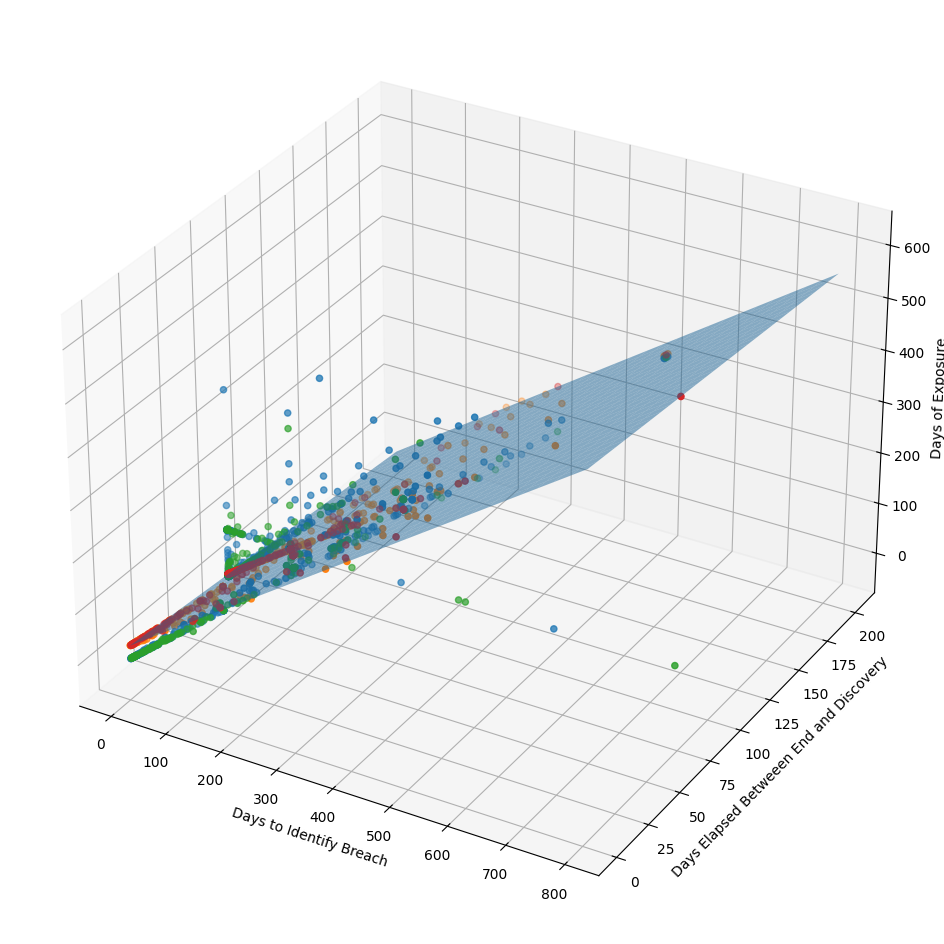

In [ ]:
X = df[['DaysToIdentifyBreach', 'DaysElapsedBetweenEndAndDiscovery']]
y = df[['DaysOfExposure']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
linModel = LinearRegression()
linModel.fit(X_train, y_train)
y_pred = linModel.predict(X_test)
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X_train['DaysToIdentifyBreach'], X_train['DaysElapsedBetweenEndAndDiscovery'], y_train)
ax.scatter3D(X_train['DaysToIdentifyBreach'], X_train['DaysElapsedBetweenEndAndDiscovery'], linModel.predict(X_train))
ax.scatter3D(X_test['DaysToIdentifyBreach'], X_test['DaysElapsedBetweenEndAndDiscovery'], y_test)
ax.scatter3D(X_test['DaysToIdentifyBreach'], X_test['DaysElapsedBetweenEndAndDiscovery'], y_pred)
xDaysToIdentifyBreach, xDaysElapsedBetweenEndAndDiscovery = np.meshgrid(
    np.linspace(X['DaysToIdentifyBreach'].min(), X['DaysToIdentifyBreach'].max(), 30),
    np.linspace(X['DaysElapsedBetweenEndAndDiscovery'].min(), X['DaysElapsedBetweenEndAndDiscovery'].max(), 30),)
yDaysOfExposure = (linModel.intercept_[0]
                        + linModel.coef_[0,0] * xDaysToIdentifyBreach
                        + linModel.coef_[0,1] * xDaysElapsedBetweenEndAndDiscovery)
ax.plot_surface(xDaysToIdentifyBreach, xDaysElapsedBetweenEndAndDiscovery, yDaysOfExposure, alpha=0.5)
ax.set_xlabel('Days to Identify Breach')
ax.set_ylabel('Days Elapsed Betweeen End and Discovery')
ax.set_zlabel('Days of Exposure')

In [ ]:
y_pred = linModel.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = mse**0.5
mae = metrics.mean_absolute_error(y_test, y_pred)
print("mean squared error = ", mse)
print("root mean squared error = ", rmse)
print("mean absolute error = ", mae)
print('r_squared = ', r2_score(y_test, y_pred), end='\n\n')

mean squared error =  2552.230352330986
root mean squared error =  50.51960364384291
mean absolute error =  28.087976243212633
r_squared =  0.525572925152055



the days of exposure influences this data and is why there is such a low r squared values, meaning there is not an association

# Conclusion
There was not a good logistic regression model in this data, and one regression plot showed a very high association which suggests the feautures might not be independent of each other. This was between the days breach lifcycles and the days to identify breach

# ***Learning***

In [ ]:
cleaned_df['DataBreachDuration'] = cleaned_df['DaysBreachLifecycle'] - cleaned_df['DaysToIdentifyBreach']
cleaned_df['BreachStartMonth'] = cleaned_df['DateStart'].dt.month
cleaned_df['BreachStartQuarter'] = cleaned_df['DateStart'].dt.quarter
cleaned_df['BreachStartYear'] = cleaned_df['DateStart'].dt.year
business_type_mapping = {
        'hospital': 'healthcare',
        'clinic': 'healthcare',
        'bank': 'finance',
        'credit union': 'finance',

    }
cleaned_df['BusinessTypeCategory'] = cleaned_df['BusinessType'].map(business_type_mapping)
data_breach_cause_mapping = {
        'hacking': 'external',
        'phishing': 'external',
        'malware': 'external',
        'employee error': 'internal',
        # ... add more mappings
    }
cleaned_df['DataBreachCauseCategory'] = cleaned_df['DataBreachCause'].map(data_breach_cause_mapping)
cleaned_df['AffectedDuration'] = cleaned_df['WashingtoniansAffected'] * cleaned_df['DataBreachDuration']
cleaned_df['WasLongBreach'] = (cleaned_df['DaysBreachLifecycle'] > 30).astype(int)  # Flag for breaches longer than 30 days


In [ ]:
data_breach_cause_mapping = {
    'hacking': 'external',
    'phishing': 'external',
    'malware': 'external',
    'ransomware': 'external',
    'social engineering': 'external',
    'unintentional disclosure': 'internal',
    'employee error': 'internal',
    'theft or mistake': 'internal',
    'physical loss': 'internal',
    'improper disposal': 'internal',
    'vendor error': 'internal',
    'unknown/unclear': 'unknown',
}

cleaned_df['internlOrexternal'] = cleaned_df['DataBreachCause'].map(data_breach_cause_mapping)

# Define features and target
X = cleaned_df[['DaysToContainBreach','DaysToIdentifyBreach', 'DaysOfExposure','WashingtoniansAffected','AffectedDuration', 'BusinessType','internlOrexternal']]
y = cleaned_df['DataBreachCause']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for numpy array

# Fit the encoder on the training data and transform both training and testing data
categorical_features = ['BusinessType', 'internlOrexternal']  # Include the new category
X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

# Get feature names after one-hot encoding
encoded_feature_names = encoder.get_feature_names_out(categorical_features)

# Create DataFrames from the encoded arrays
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_feature_names, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_feature_names, index=X_test.index)

# Concatenate the encoded features with the numerical features
X_train = pd.concat([X_train.drop(['BusinessType', 'internlOrexternal'], axis=1), X_train_encoded_df], axis=1) # Changed here
X_test = pd.concat([X_test.drop(['BusinessType', 'internlOrexternal'], axis=1), X_test_encoded_df], axis=1) # Changed here


# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define sampling strategy for SMOTE
sampling_strategy = {
    'theft or mistake': 100,  # Oversample to 100 samples
    'unauthorized access': 50  # Oversample to 50 samples
}

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Now, train your KNN classifier on the resampled data
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_resampled, y_train_resampled)







# Make predictions and evaluate as before
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.6707818930041153
                     precision    recall  f1-score   support

        cyberattack       0.74      0.81      0.77       170
   theft or mistake       1.00      0.83      0.90        23
unauthorized access       0.17      0.14      0.16        50

           accuracy                           0.67       243
          macro avg       0.64      0.59      0.61       243
       weighted avg       0.65      0.67      0.66       243

[[137   0  33]
 [  4  19   0]
 [ 43   0   7]]


# Supervised Conclusion
The model performs well for the dominant class(cyberattack) and smaller but distinguishable class (theft or mistake).Unfortunately, Performance is poor for unauthorized access.This  is likely caused by the imblaced of the dataset even after using SMOTE.


# Unsupervized Introduction

The following code aims to group similar data breaches together based on features like the duration of the breach, the number of people affected, and the time taken to contain the breach. This is done without any pre-existing labels or categories

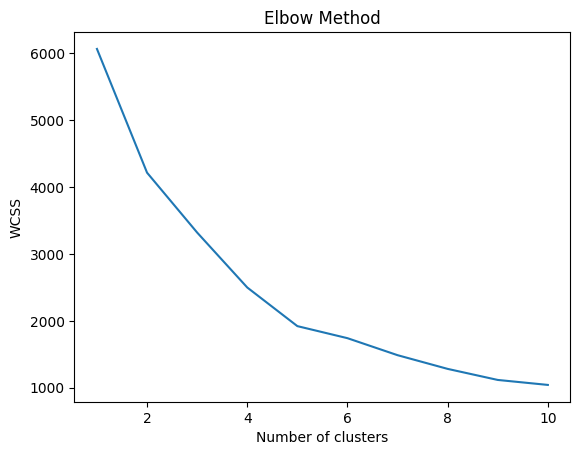

        DaysToContainBreach                                              \
                      count       mean        std  min   25%  50%   75%   
Cluster                                                                   
0                    1155.0   4.143723  17.692642  0.0  0.00  0.0   5.0   
1                      52.0  37.750000  89.514568  0.0  0.00  0.0  10.5   
2                       6.0   3.833333   2.316607  0.0  2.75  5.0   5.0   

               DaysToIdentifyBreach              ... WashingtoniansAffected  \
           max                count        mean  ...                    75%   
Cluster                                          ...                          
0        365.0               1155.0   82.932468  ...                6476.50   
1        366.0                 52.0  920.807692  ...                4601.25   
2          6.0                  6.0   57.500000  ...             2845368.00   

                   DaysBreachLifecycle                                    

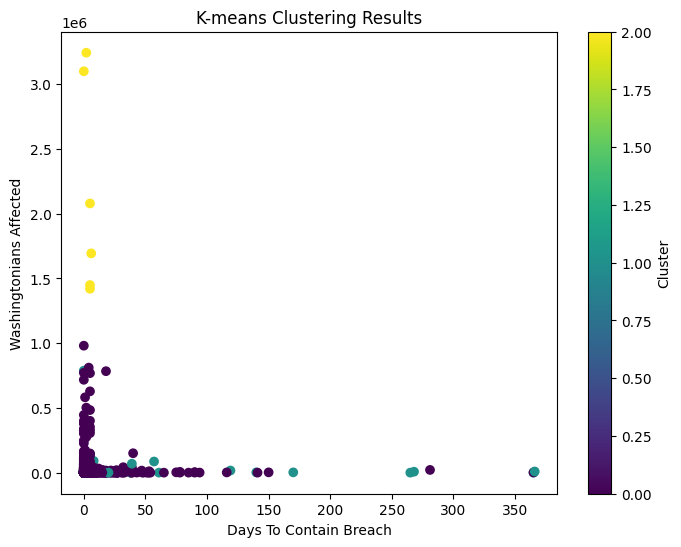

In [ ]:

features_for_clustering = ['DaysToContainBreach', 'DaysToIdentifyBreach', 'DaysOfExposure', 'WashingtoniansAffected', 'DaysBreachLifecycle']
X_cluster = cleaned_df[features_for_clustering]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Determine optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


# Apply K-means clustering with the chosen number of clusters (e.g., 3 based on the Elbow method)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
cleaned_df['Cluster'] = kmeans.fit_predict(X_scaled)

# Analyze the clusters (example: group by cluster and get descriptive statistics)
cluster_analysis = cleaned_df.groupby('Cluster')[features_for_clustering].describe()
print(cluster_analysis)

# Visualization (example: scatter plot of two features colored by cluster)
plt.figure(figsize=(8, 6))
plt.scatter(cleaned_df['DaysToContainBreach'], cleaned_df['WashingtoniansAffected'], c=cleaned_df['Cluster'], cmap='viridis')
plt.xlabel('Days To Contain Breach')
plt.ylabel('Washingtonians Affected')
plt.title('K-means Clustering Results')
plt.colorbar(label='Cluster')
plt.show()

# Unsupervized Conclusion

The K-means clustering results displayed in the scatter plot illustrate how the data is grouped into three clusters based on two key variables: Days to Contain Breach and Washingtonians Affected. Here's an analysis of what can be inferred from the visualization:

The 1rst group or the purple clusters shows cyberattack incidents that were relatively easy to contain and thus impacted the least amount of people.

the 2nd group or the cyan clusters contains outliers with higher containment times (up to 300+ days) but still relatively small populations affected. Suggesting that thease incidents did not have the same urgency as the first cluster

Cluster 2 or the yellow clusters represent outliers that were high impact incdents affecting millions in the washinton areas. Its worth notings that thease clust typically have varying containment types suggesting that these incidents were able to spread fast perhaps these incidents were caused by a worm.
